In [37]:
#modelFolder = '../../SiameseOld/arch_17'
modelFolder = '../../DPrimeCNN/arch_17_c'
#modelFolder = '../../SiameseOld/arch_17_1_IITDL'
#modelFolder = '../../DPrimeCNN/arch_17_6'
#modelFolder = '../../SiameseOld/arch_17_casia'
#modelFolder = '../../SiameseOld/arch_17_hkpoly'
#modelFolder = '../../SiameseOld/arch_17_IITD_casia'
#modelFolder = '../../SiameseOld/arch_17_IITD_HKPoly'
#modelFolder = '../../SiameseOld/arch_17_casia_IITD'
#modelFolder = '../../SiameseOld/arch_17_1_To_Casia'
#modelFolder = '../../SiameseOld/arch_17_casia_1_IITD'
methodName = "CNN"
#modelFolder = '../../SiameseOld/Baseline/OrdCode'
#methodName = "OC"
#modelFolder = '../../SiameseOld/Baseline/CompCode'
#methodName = "CC"
datasetName = 'Casia'
#datasetName = 'HKPoly'
#datasetName = 'IITD'
#datasetName = 'IITDL'

d-prime: 2.23338180226
d-prime: 2.32632812293
d-prime: 2.33396167435
d-prime: 2.34230435367
d-prime: 2.26305567883
d-prime: 2.02417710775
d-prime: 2.13577394317
d-prime: 2.15469838789
d-prime: 2.15155081439
d-prime: 2.1265197645
d-prime: 2.22697203992
d-prime: 2.32711804604
d-prime: 2.33981463634
d-prime: 2.35084766745
d-prime: 2.26147877207
d-prime: 2.04835810758
d-prime: 2.16344334828
d-prime: 2.17107626622
d-prime: 2.18245877884
d-prime: 2.16155481066
d-prime: 2.07428946311
d-prime: 2.14331732659
d-prime: 2.15883556562
d-prime: 2.17400534388
d-prime: 2.1000681882
d-prime: 2.23779623367
d-prime: 2.35696831083
d-prime: 2.37840784482
d-prime: 2.38286150248
d-prime: 2.3204642649
d-prime: 2.24918643965
d-prime: 2.35162354454
d-prime: 2.35064132585
d-prime: 2.34647207086
d-prime: 2.27504427121
d-prime: 1.85266386877
d-prime: 1.94703486021
d-prime: 1.96477157267
d-prime: 1.96181844409
d-prime: 1.93922034136
EER total: 3.15%
d-prime total: 2.20


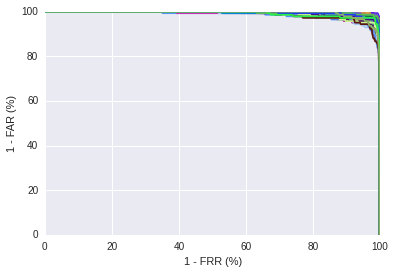

file encoding: None
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec}
\usepackage{pgfplots}
file encoding: None
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec}
\usepackage{pgfplots}


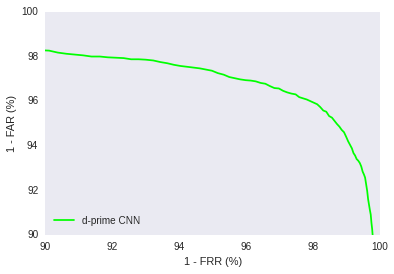

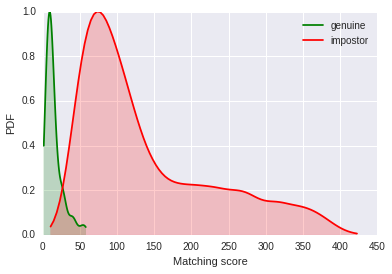

In [40]:
%matplotlib inline
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save

import bob.measure
import seaborn as sns
    
samplesPerClass = 5
eerTot = 0
dprimeTot = 0
models = [1, 2, 3, 4, 5, 6, 7, 8]
samples = [1, 2, 3, 4, 5]#, 6, 7, 8, 9, 10]
xda = []
yda = []
i = 400
gsc = {}
isc = {}
for m in models:
    for s in samples:
        genuine = []
        impostor = []
        with open(modelFolder + '_' + str(m) + '/genuine_' + datasetName + '_' + str(s) + '.csv') as f:
            reader = csv.reader(f)
            genuine.extend(map(float, list(reader)[0]))
        with open(modelFolder + '_' + str(m) + '/impostor_' + datasetName + '_' + str(s) + '.csv') as f:
            reader = csv.reader(f)
            impostor.extend(map(float, list(reader)[0]))
        genuine = np.array(genuine)
        impostor = np.array(impostor)

        #print(genuine.min())

        Teer = bob.measure.eer_threshold(impostor, genuine)
        far, frr = bob.measure.farfrr(impostor, genuine, Teer)
        
        
        far, frr = 1 - far, 1 - frr
        eerTot = eerTot + ((far + frr) / 2.0)

        correctImpostor = bob.measure.correctly_classified_negatives(impostor, Teer)
        wrongImpostor = len(impostor) - correctImpostor.sum()
        correctGenuine = bob.measure.correctly_classified_positives(genuine, Teer)
        wrongGenuine = len(genuine) - correctGenuine.sum()

        gMu, gSig = np.mean(genuine), np.std(genuine)
        iMu, iSig = np.mean(impostor), np.std(impostor)
        dprime = np.abs(gMu - iMu) / np.sqrt(0.5 * (gSig**2 + iSig**2))
        dprimeTot = dprimeTot + dprime
        print('d-prime: {0}'.format(dprime))

        #print('EER Threshold: {0}'.format(Teer))
        #print('FAR: {:.2f}% ({:}/{:})'.format(far * 100, wrongImpostor, len(impostor)))
        #print('FRR: {:.2f}% ({:}/{:}))'.format(frr * 100, wrongGenuine, len(genuine)))
        #print('')

        ########## ROC #############    
        npoints = 1000
        sns.set_style('dark')
        plotData = bob.measure.plot.roc(impostor, genuine, npoints, color=(np.random.rand(), 1 - np.random.rand(), np.random.rand()), linestyle='-', label='ep ' + str(i) + ' probe ' + str(s)) 
        plt.xlabel('1 - FRR (%)') 
        plt.ylabel('1 - FAR (%)') 
        #plt.xlim(80, 100)
        #plt.ylim(80, 100)
        #plt.legend(loc = 3)
        #plt.yscale('symlog')
        #plt.xscale('symlog')
        plt.grid(True)

        xda.append(plotData[0].get_xdata())
        yda.append(plotData[0].get_ydata())

eerTot = eerTot / float(len(models) * len(samples))
dprimeTot = dprimeTot / float(len(models) * len(samples))
print('EER total: {:.2f}%'.format(eerTot * 100))
print('d-prime total: {:.2f}'.format(dprimeTot))
plt.show() 

fig = plt.figure()
gsc[methodName] = np.mean(xda, axis = 0)
isc[methodName] = np.mean(yda, axis = 0)
#plt.plot(gsc['OC'], isc['OC'], color = (1, 0, 0), label = 'Ordinal Code')
#plt.plot(gsc['CC'], isc['CC'], color = (0, 0, 1), label = 'Competitive Code')
plt.plot(gsc['CNN'], isc['CNN'], color = (0, 1, 0), label = 'd-prime CNN')        
plt.xlabel('1 - FRR (%)') 
plt.ylabel('1 - FAR (%)') 
plt.xlim(90, 100)
plt.ylim(90, 100)
plt.legend(loc = 3)
plt.gcf().set_rasterized(True)
#plt.show()
tikz_save(
    'roc_' + datasetName + '.tex',
    figureheight = '0.85\\figureheight',
    figurewidth = '\\figurewidth'
    )
fig.savefig('roc_' + datasetName + '.eps', format = 'eps')

########## Distributions #############
fig = plt.figure()
from scipy.stats.kde import gaussian_kde
def kdeplot_normalized(data, shade = True, color = 'b', label = ''):
    kde = gaussian_kde(data)
    dist_space = np.linspace(min(data) - 0.5, max(data) + 0.5, 100)
    kde_dist_space = kde(dist_space)
    kde_dist_space /= max(kde_dist_space)
    sns.set_style('darkgrid')
    ax = plt.subplot(111)
    plt.plot(dist_space, kde_dist_space, color = color, label = label)
    if shade:
        plt.fill_between(dist_space, 0, kde_dist_space, alpha = 0.2, color = color)
    
    return ax

gkde = kdeplot_normalized(genuine, color = 'g', label = 'genuine')
ikde = kdeplot_normalized(impostor, color = 'r', label = 'impostor')

gkde.set_ylim(0, 1)
ikde.set_ylim(0, 1)

plt.legend(loc = 'upper right')
plt.xlabel('Matching score')
plt.ylabel('PDF')
plt.grid(True)
plt.legend(loc = 0)
plt.gcf().set_rasterized(True)
#plt.show()
tikz_save(
    'dist_' + datasetName + '_' + methodName + '.tex',
    figureheight = '0.85\\figureheight',
    figurewidth = '\\figurewidth'
    )
#tikz_save('dist_' + datasetName + '_' + methodName + '.tex', figureheight='4cm', figurewidth='6cm');
fig.savefig('dist_' + datasetName + '_' + methodName + '.eps', format = 'eps')
 

1000
1000
1000
1000


(0.0, 0.2)

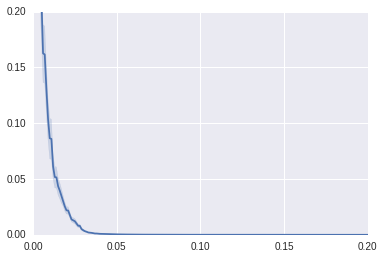

In [159]:
import seaborn as sns
print(len(fars1))
print(len(fars2))
print(len(fars3))
print(len(frrs1))
#sns.tsplot(1 - frrs1, time=np.arange(0,1,1./1000.))
out = np.interp(np.arange(0,1,1./1000.), 1 - frrs1, fars1)
out2 = np.interp(np.arange(0,1,1./1000.), 1 - frrs2, fars2)
out3 = np.interp(np.arange(0,1,1./1000.), 1 - frrs3, fars3)
out4 = np.interp(np.arange(0,1,1./1000.), 1 - frrs4, fars4)
out5 = np.interp(np.arange(0,1,1./1000.), 1 - frrs5, fars5)
out6 = np.interp(np.arange(0,1,1./1000.), 1 - frrs6, fars6)
out7 = np.interp(np.arange(0,1,1./1000.), 1 - frrs7, fars7)
out8 = np.interp(np.arange(0,1,1./1000.), 1 - frrs8, fars8)
sns.tsplot([out, out2, out3, out4, out5, out6, out7, out8], time=1 - np.arange(0,1,1./1000.))
plt.xlim([0.0, 0.2])
plt.ylim([0.0, 0.2])

    
    

d-prime: 2.28394612872
EER Threshold: 10.3861632449
FAR: 7.97% (6571/7140)
FRR: 8.24% (78/85))

d-prime: 2.45228906503
EER Threshold: 9.5279663843
FAR: 5.88% (6720/7140)
FRR: 5.88% (80/85))

d-prime: 2.46176927771
EER Threshold: 9.78095793888
FAR: 6.46% (6679/7140)
FRR: 5.88% (80/85))

d-prime: 2.51530096854
EER Threshold: 9.13464147597
FAR: 5.00% (6783/7140)
FRR: 4.71% (81/85))

d-prime: 2.35548156028
EER Threshold: 9.65763455408
FAR: 5.98% (6713/7140)
FRR: 5.88% (80/85))

EER total: 6.19%
d-prime total: 2.41


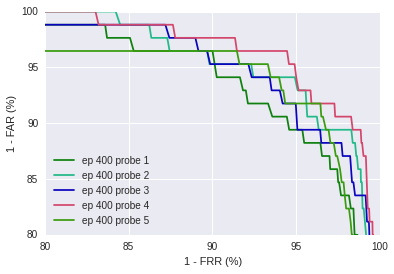

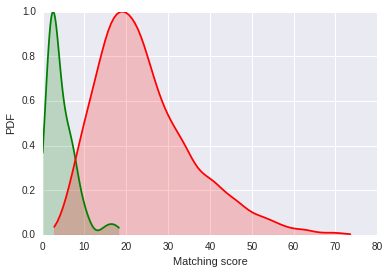

In [169]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt

import bob.measure
import seaborn as sns
    
samplesPerClass = 5
eerTot = 0
dprimeTot = 0
samples = [1, 2, 3, 4, 5]
epochs = [400]
for s in samples:
    for i in epochs:
        genuine = []
        impostor = []
        with open(modelFolder + '/scoresPos' + str(i) + '_' + str(s) + '.csv') as f:
            reader = csv.reader(f)
            genuine.extend(map(float, list(reader)[0]))
        with open(modelFolder + '/scoresNeg' + str(i) + '_' + str(s) + '.csv') as f:
            reader = csv.reader(f)
            impostor.extend(map(float, list(reader)[0]))
        genuine = np.array(genuine)
        impostor = np.array(impostor)

        #print(genuine.min())

        Teer = bob.measure.eer_threshold(impostor, genuine)
        far, frr = bob.measure.farfrr(impostor, genuine, Teer)
        far, frr = 1 - far, 1 - frr
        eerTot = eerTot + ((far + frr) / 2.0)

        correctImpostor = bob.measure.correctly_classified_negatives(impostor, Teer)
        wrongImpostor = len(impostor) - correctImpostor.sum()
        correctGenuine = bob.measure.correctly_classified_positives(genuine, Teer)
        wrongGenuine = len(genuine) - correctGenuine.sum()

        gMu, gSig = np.mean(genuine), np.std(genuine)
        iMu, iSig = np.mean(impostor), np.std(impostor)
        dprime = np.abs(gMu - iMu) / np.sqrt(0.5 * (gSig**2 + iSig**2))
        dprimeTot = dprimeTot + dprime
        print('d-prime: {0}'.format(dprime))
        
        print('EER Threshold: {0}'.format(Teer))
        print('FAR: {:.2f}% ({:}/{:})'.format(far * 100, wrongImpostor, len(impostor)))
        print('FRR: {:.2f}% ({:}/{:}))'.format(frr * 100, wrongGenuine, len(genuine)))
        print('')

        ########## ROC #############    
        npoints = 1000
        sns.set_style('dark')
        bob.measure.plot.roc(impostor, genuine, npoints, color=(np.random.rand(), 1 - np.random.rand(), np.random.rand()), linestyle='-', label='ep ' + str(i) + ' probe ' + str(s)) 
        plt.xlabel('1 - FRR (%)') 
        plt.ylabel('1 - FAR (%)') 
        plt.xlim(80, 100)
        plt.ylim(80, 100)
        plt.legend(loc = 3)
        #plt.yscale('symlog')
        #plt.xscale('symlog')
        plt.grid(True)
    
eerTot = eerTot / float(len(samples))
dprimeTot = dprimeTot / float(len(samples))
print('EER total: {:.2f}%'.format(eerTot * 100))
print('d-prime total: {:.2f}'.format(dprimeTot))
plt.show() 

########## Distributions #############
from scipy.stats.kde import gaussian_kde
def kdeplot_normalized(data, shade = True, color = 'b'):
    kde = gaussian_kde(data)
    dist_space = np.linspace(min(data) - 0.5, max(data) + 0.5, 100)
    kde_dist_space = kde(dist_space)
    kde_dist_space /= max(kde_dist_space)
    sns.set_style('darkgrid')
    ax = plt.subplot(111)
    plt.plot(dist_space, kde_dist_space, color = color)
    if shade:
        plt.fill_between(dist_space, 0, kde_dist_space, alpha = 0.2, color = color)
    
    return ax

gkde = kdeplot_normalized(genuine, color = 'g')
ikde = kdeplot_normalized(impostor, color = 'r')

gkde.set_ylim(0, 1)
ikde.set_ylim(0, 1)

plt.legend(loc = 'upper right')
plt.xlabel('Matching score')
plt.ylabel('PDF')
plt.grid(True)
plt.show()
 